# Proyek Analisis Data: Air Quality
- Nama: Frans Gabriel Sianturi
- Email: frans.gabriels12@gmail.com
- Id Dicoding: frans_sianturi
- URL Streamlit : submission-data-science-fransgs.streamlit.app

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana tren perubahan kualitas udara di setiap stasiun pada tahun 2015 ?
- Pertanyaan 2 : Polutan apa yang paling dominan dan tidak dominan tersebar di udara pada semua stasiun ?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
from metpy.calc import relative_humidity_from_dewpoint
from metpy.units import units
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data
Pada tahap ini data kualitas udara dari setiap stasiun akan di load dan dijadikan dataframe

In [2]:
# list semua file
sources = [
    'PRSA_Data_Aotizhongxin_20130301-20170228.csv',
    'PRSA_Data_Changping_20130301-20170228.csv',
    'PRSA_Data_Dingling_20130301-20170228.csv',
    'PRSA_Data_Dongsi_20130301-20170228.csv',
    'PRSA_Data_Guanyuan_20130301-20170228.csv',
    'PRSA_Data_Gucheng_20130301-20170228.csv',
    'PRSA_Data_Huairou_20130301-20170228.csv',
    'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
    'PRSA_Data_Shunyi_20130301-20170228.csv',
    'PRSA_Data_Tiantan_20130301-20170228.csv',
    'PRSA_Data_Wanliu_20130301-20170228.csv',
    'PRSA_Data_Wanshouxigong_20130301-20170228.csv'
]

# list semua stasiun
stations = [source.split('_')[2].lower() for source in sources]

In [3]:
# membuat variabel dataframe
dfs = {}
for i, source in enumerate(sources):
    dfs[stations[i]] = pd.read_csv('data/'+source)
    
aotizhongxin_df = dfs['aotizhongxin']
changping_df = dfs['changping']
dingling_df = dfs['dingling']
dongsi_df = dfs['dongsi']
guanyuan_df = dfs['guanyuan']
gucheng_df = dfs['gucheng']
huairou_df = dfs['huairou'] 
nongzhanguan_df = dfs['nongzhanguan']
shunyi_df = dfs['shunyi']
tiantan_df = dfs['tiantan']
wanliu_df = dfs['wanliu']
wanshouxigong_df = dfs['wanshouxigong']

In [4]:
# membuat dataframe baru dengan menggabungkan data dari semua stasiun
new_df = pd.concat([aotizhongxin_df,
                    changping_df,
                    dingling_df,
                    dongsi_df,
                    guanyuan_df,
                    gucheng_df,
                    huairou_df,
                    nongzhanguan_df,
                    shunyi_df, 
                    tiantan_df,
                    wanliu_df,
                    wanshouxigong_df], ignore_index=True)

In [5]:
# menghapus kolom No pada dataframe
new_df.drop(labels='No', axis=1, inplace=True)

In [6]:
# menambahkan kolom id sebagai identifier tiap baris
id = new_df.index + 1
new_df.insert(loc=0, column='id', value=id)
new_df['id'] = new_df.id.astype(str)

In [7]:
new_df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


### Assessing Data

#### Menilai dataframe air quality

In [8]:
# cek tipe data tiap atribut
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       420768 non-null  object 
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(3)
memory usage: 57.8+ MB


In [9]:
# cek missing value
new_df.isna().sum()

id             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [10]:
# cek duplikasi
new_df.duplicated().sum()

0

### Cleaning Data

#### Membersihkan dataframe

In [11]:
# memperbaiki missing value
new_df.dropna(inplace=True)

In [12]:
new_df.isna().sum()

id         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [13]:
# membuat kolom datetime untuk selanjutnya dianalisis
datetime = pd.to_datetime(new_df[['year', 'month', 'day', 'hour']])
new_df.insert(loc=1, column='datetime', value=datetime)

In [14]:
new_df.describe()

,datetime,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,382168,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000
mean,2015-03-19 02:55:51.850494976,2014.714905,6.475087,15.711308,11.575184,79.432383,104.573837,15.634814,50.570068,1229.940563,57.376676,13.518694,1010.813471,2.417195,0.065030,1.738031
min,2013-03-01 00:00:00,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,0.000000
25%,2014-04-05 09:00:00,2014.000000,3.000000,8.000000,6.000000,20.000000,36.000000,2.000000,23.000000,500.000000,10.495800,3.100000,1002.400000,-9.000000,0.000000,0.900000
50%,2015-03-25 06:00:00,2015.000000,6.000000,16.000000,12.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.400000,1010.400000,3.000000,0.000000,1.400000
75%,2016-03-09 18:00:00,2016.000000,9.000000,23.000000,18.000000,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,2017-02-28 23:00:00,2017.000000,12.000000,31.000000,23.000000,844.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000
std,NaN,1.160266,3.449317,8.803064,6.933552,80.154901,91.379446,21.306103,35.062086,1157.151476,56.709013,11.425355,10.452381,13.798402,0.823901,1.241152


## Exploratory Data Analysis (EDA)

### Explore dataset air quality

In [15]:
new_df.describe(include="all")

,id,datetime,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,382168,382168,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168,382168.000000,382168
unique,382168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Nongzhanguan
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39319,NaN,33114
mean,NaN,2015-03-19 02:55:51.850494976,2014.714905,6.475087,15.711308,11.575184,79.432383,104.573837,15.634814,50.570068,1229.940563,57.376676,13.518694,1010.813471,2.417195,0.065030,NaN,1.738031,NaN
min,NaN,2013-03-01 00:00:00,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,NaN,0.000000,NaN
25%,NaN,2014-04-05 09:00:00,2014.000000,3.000000,8.000000,6.000000,20.000000,36.000000,2.000000,23.000000,500.000000,10.495800,3.100000,1002.400000,-9.000000,0.000000,NaN,0.900000,NaN
50%,NaN,2015-03-25 06:00:00,2015.000000,6.000000,16.000000,12.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.400000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN
75%,NaN,2016-03-09 18:00:00,2016.000000,9.000000,23.000000,18.000000,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN
max,NaN,2017-02-28 23:00:00,2017.000000,12.000000,31.000000,23.000000,844.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,NaN,13.200000,NaN


In [16]:
# menambahkan unit ke dalam kolom temp dan dewp untuk menghitung kelembapan
temp_values = new_df['TEMP'].values * units.degC
dewp_values = new_df['DEWP'].values * units.degC

# menghitung dan Membuat kolom kelembapan
RH = relative_humidity_from_dewpoint(temp_values, dewp_values).to(units.percent)
new_df.insert(loc=15, column='RH', value=RH.magnitude)

new_df.head()

,id,datetime,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RH,RAIN,wd,WSPM,station
0,1,2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,23.991881,0.0,NNW,4.4,Aotizhongxin
1,2,2013-03-01 01:00:00,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,25.996252,0.0,N,4.7,Aotizhongxin
2,3,2013-03-01 02:00:00,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,25.996252,0.0,NNW,5.6,Aotizhongxin
3,4,2013-03-01 03:00:00,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,23.991168,0.0,NW,3.1,Aotizhongxin
4,5,2013-03-01 04:00:00,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,24.860221,0.0,N,2.0,Aotizhongxin


In [17]:
# membuat grup berdasarkan stasiun
new_df.groupby(by="station").id.nunique().sort_values(ascending=False)

station
Nongzhanguan     33114
Tiantan          32843
Wanshouxigong    32768
Changping        32681
Gucheng          32504
Guanyuan         32263
Aotizhongxin     31815
Huairou          31708
Dingling         31306
Wanliu           30634
Dongsi           30338
Shunyi           30194
Name: id, dtype: int64

In [18]:
# membuat grup berdasarkan angin
new_df.groupby(by="wd").id.nunique().sort_values(ascending=False)

wd
NE     39319
ENE    31139
NW     30042
N      27994
E      27296
SW     26356
NNE    25596
NNW    23152
ESE    22188
WNW    22156
SSW    20696
SE     18365
WSW    18210
S      17683
SSE    16057
W      15919
Name: id, dtype: int64

In [29]:
# menghitung korelasi
new_df[['TEMP', 'PRES', 'DEWP', 'RH', 'RAIN', 'WSPM']].corr()

,TEMP,PRES,DEWP,RH,RAIN,WSPM
TEMP,1.000000,-0.812456,0.820672,0.106635,0.037182,0.026664
PRES,-0.812456,1.000000,-0.750758,-0.233779,-0.060999,0.072249
DEWP,0.820672,-0.750758,1.000000,0.637592,0.086424,-0.299137
RH,0.106635,-0.233779,0.637592,1.000000,0.121474,-0.530308
RAIN,0.037182,-0.060999,0.086424,0.121474,1.000000,0.021866
WSPM,0.026664,0.072249,-0.299137,-0.530308,0.021866,1.000000


In [20]:
new_df.describe()

,datetime,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RH,RAIN,WSPM
count,382168,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000
mean,2015-03-19 02:55:51.850494976,2014.714905,6.475087,15.711308,11.575184,79.432383,104.573837,15.634814,50.570068,1229.940563,57.376676,13.518694,1010.813471,2.417195,53.025725,0.065030,1.738031
min,2013-03-01 00:00:00,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,2.987226,0.000000,0.000000
25%,2014-04-05 09:00:00,2014.000000,3.000000,8.000000,6.000000,20.000000,36.000000,2.000000,23.000000,500.000000,10.495800,3.100000,1002.400000,-9.000000,30.878355,0.000000,0.900000
50%,2015-03-25 06:00:00,2015.000000,6.000000,16.000000,12.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.400000,1010.400000,3.000000,51.976714,0.000000,1.400000
75%,2016-03-09 18:00:00,2016.000000,9.000000,23.000000,18.000000,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,74.787075,0.000000,2.200000
max,2017-02-28 23:00:00,2017.000000,12.000000,31.000000,23.000000,844.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,100.000000,72.500000,13.200000
std,NaN,1.160266,3.449317,8.803064,6.933552,80.154901,91.379446,21.306103,35.062086,1157.151476,56.709013,11.425355,10.452381,13.798402,25.317071,0.823901,1.241152


In [21]:
new_df.station

0          Aotizhongxin
1          Aotizhongxin
2          Aotizhongxin
3          Aotizhongxin
4          Aotizhongxin
              ...      
420763    Wanshouxigong
420764    Wanshouxigong
420765    Wanshouxigong
420766    Wanshouxigong
420767    Wanshouxigong
Name: station, Length: 382168, dtype: object

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren perubahan kualitas udara di setiap stasiun pada tahun 2015 ?

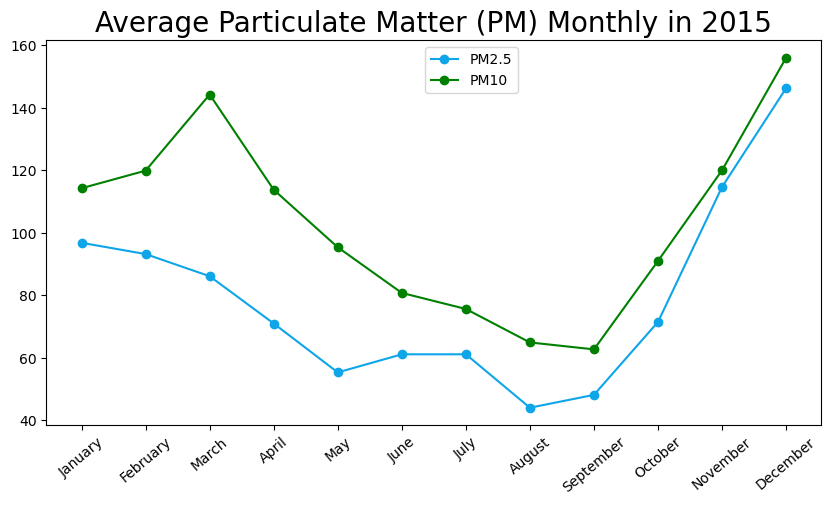

In [22]:
monthly_pollutions = new_df[new_df.datetime.dt.year == 2015]
monthly_pollutions = monthly_pollutions.resample(rule='M', on='datetime').agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean"
})

monthly_pollutions.index = monthly_pollutions.index.strftime('%B')

plt.figure(figsize=(10, 5))
plt.plot(monthly_pollutions.index, monthly_pollutions['PM2.5'], marker='o', color='#0ea5e9', label='PM2.5')
plt.plot(monthly_pollutions.index, monthly_pollutions['PM10'], marker='o', color='g', label='PM10')

plt.xticks(rotation=40)
plt.title(label='Average Particulate Matter (PM) Monthly in 2015', loc='center', fontsize=20)
plt.figlegend(loc='center', bbox_to_anchor=(0.55, 0.82))
plt.show()

Gambar diatas merupakan grafik PM2.5 dan PM10 dalam bulanan sepanjang tahun 2015. PM2.5 merupakan Particulate Matter (PM) dengan diameter kurang dari atau sama dengan 2.5 mikrometer. Partikel ini sangat kecil sehingga dapat masuk ke dalam saluran pernapasan dan bahkan melewati sistem pertahanan alami tubuh manusia, mencapai paru-paru dan bahkan aliran darah yang dimana Sumbernya bisa berasal dari pembakaran bahan bakar, aktivitas industri, debu, asap rokok, dan proses alami seperti kebakaran hutan. Sedangkan PM10 merupakan Partikulat Matter dengan diameter kurang dari atau sama dengan 10 mikrometer. Partikel ini lebih besar dari PM2.5 tetapi masih cukup kecil untuk dapat terhirup ke dalam paru-paru. Sumber PM10 bisa mirip dengan PM2.5, seperti debu, asap dari kendaraan, dan aktivitas industri. Berdasarkan grafik diatas dapat disimpulkan PM2.5 dan PM10 terjadi penurunan tren pada bulan Maret hingga September dan kemudian terjadi kenaikan tren pada bulan September hingga Desember.

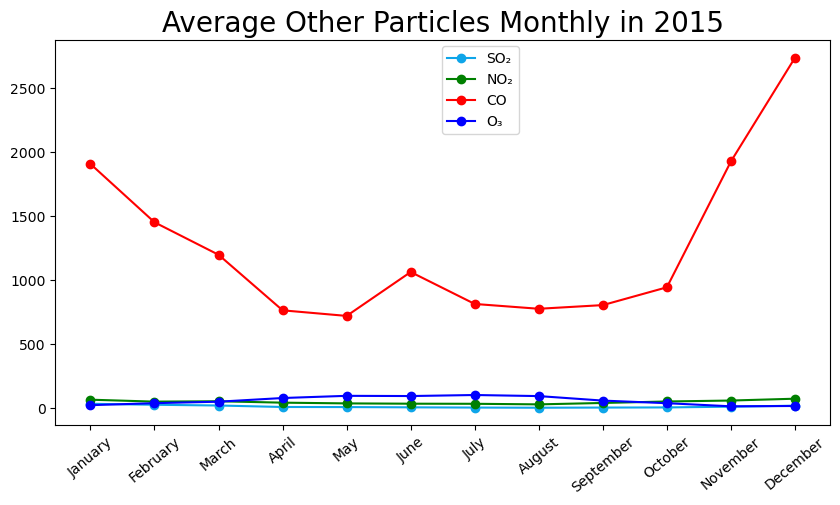

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_pollutions.index, monthly_pollutions['SO2'], marker='o', color='#0ea5e9', label='SO₂')
plt.plot(monthly_pollutions.index, monthly_pollutions['NO2'], marker='o', color='g', label='NO₂')
plt.plot(monthly_pollutions.index, monthly_pollutions['CO'], marker='o', color='r', label='CO')
plt.plot(monthly_pollutions.index, monthly_pollutions['O3'], marker='o', color='b', label='O₃')


plt.xticks(rotation=40)
plt.title(label='Average Other Particles Monthly in 2015', loc='center', fontsize=20)
plt.figlegend(loc='center', bbox_to_anchor=(0.55, 0.78))
plt.show()

Gambar diatas merupakan grafik partikel lainnya selain PM2.5 dan PM10 yang tersebar di udara. Berdasarkan grafik diatas dapat diamati bahwa partikel CO (Karbon Monoksida) yang memiliki nilai tertinggi yakni lebih dari 500 mikro/meter^3 dengan tren menurun pada bulan Januari hingga September dan tren naik pada bulan September hingga Desember tahun 2015. Sementara itu partikel lainnya berada di bawah nilai 500 mikro/m^3 dengan tren yang cenderung stagnan. Hal ini menandakan partikel CO mendominasi tersebar di udara pada setiap stasiun.

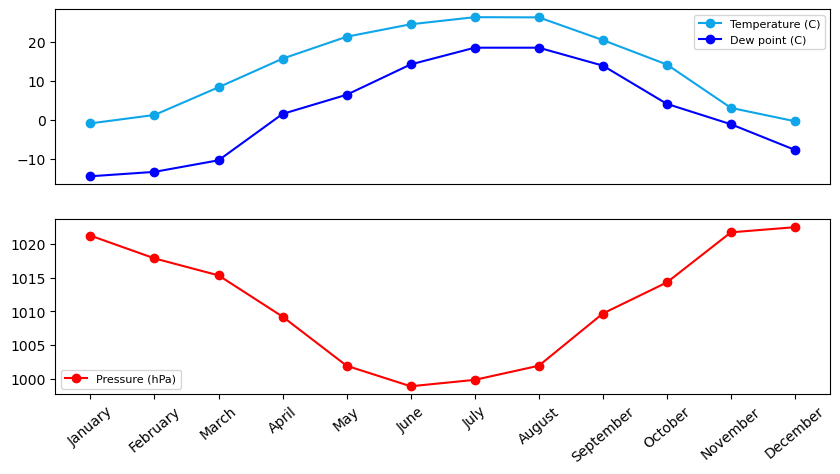

In [24]:
monthly_elements = new_df[new_df.datetime.dt.year == 2015]
monthly_elements = monthly_elements.resample(rule='M', on='datetime').agg({
    "TEMP": "mean",
    "PRES": "mean",
    "DEWP": "mean",
    "RH": "mean",
    "RAIN": "mean",
    "WSPM": "mean"
})

monthly_elements.index = monthly_elements.index.strftime('%B')

plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.plot(monthly_elements.index, monthly_elements['TEMP'], marker='o', color='#0ea5e9', label='Temperature (C)')
plt.plot(monthly_elements.index, monthly_elements['DEWP'], marker='o', color='b', label='Dew point (C)')
plt.xticks([])
plt.legend(fontsize=8)
plt.subplot(212)
plt.plot(monthly_elements.index, monthly_elements['PRES'], marker='o', color='r', label='Pressure (hPa)')
plt.legend(fontsize=8)

plt.xticks(rotation=40)
plt.show()

Gambar diatas merupakan grafik dari unsur-unsur cuaca yakni titik embun, suhu udara, dan tekanan. Berdasarkan grafik diatas titik embun dan suhu udara memiliki tren yang sama yakni terjadi kenaikan pada bulan Januari hingga Agustus dan kemudian terjadi penurunan setelahnya. Sebaliknya, grafik tekanan berbanding terbalik dengan suhu udara dan titik embun.

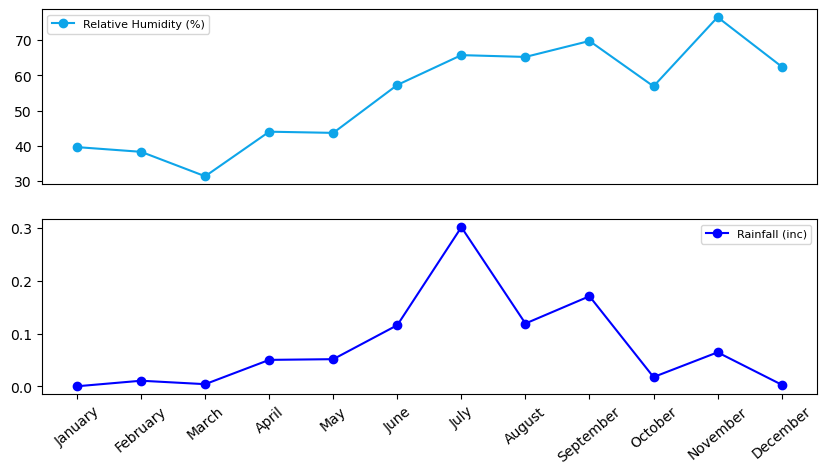

In [25]:
plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.plot(monthly_elements.index, monthly_elements['RH'], marker='o', color='#0ea5e9', label='Relative Humidity (%)')
plt.xticks([])
plt.legend(fontsize=8)
plt.subplot(212)
plt.plot(monthly_elements.index, monthly_elements['RAIN'], marker='o', color='b', label='Rainfall (inc)')
plt.legend(fontsize=8)

plt.xticks(rotation=40)
plt.show()

Gambar diatas merupakan grafik kelembapan relatif dan curah hujan. Kelembapan relatif sangat menentukan terjadinya hujan. Berdasarkan grafik diatas kelembapan relatif cenderung mengalami tren naik setiap bulannya. Sementara itu, curah hujan mengalami tren naik dari bulan Januari hingga Juli dan mengalami tren turun dari bulan Juli hingga Desember.

### Pertanyaan 2: polutan apa yang paling dominan dan tidak dominan jumlahnya di semua stasiun ?

In [26]:
pollution_df = new_df.groupby(by=['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean",
})

pollution_df = pollution_df.mean().sort_values(ascending=True)

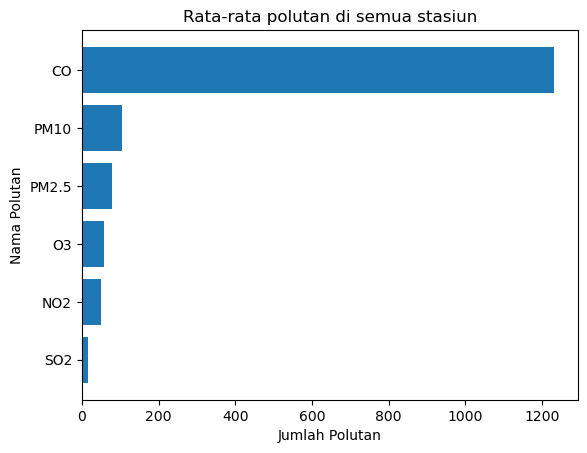

In [27]:
plt.barh(pollution_df.index, pollution_df.values)
plt.title(label="Rata-rata polutan di semua stasiun")
plt.xlabel("Jumlah Polutan")
plt.ylabel("Nama Polutan")
plt.show()

Berdasarkan gambar di atas dapat diamati bahwa polutan paling dominan jumlahnya adalah CO dan yang tidak dominan adalah SO2.

## Conclusion

- Pertanyaan 1 : Bagaimana tren perubahan kualitas udara di setiap stasiun pada tahun 2015 ?
> Berdasarkan analisis sebelumnya dapat disimpulkan bahwa PM2.5, PM10, dan CO memiliki tren yang hampir sama setiap bulannya pada tahun 2015. Sedangkan partikel SO2, NO2, CO, dan O3 memiliki tren yang cenderung stagnan. Unsur-unsur cuaca suhu udara dan titik embun memiliki tren yang sama, sedangkan tekanan memiliki tren yang berbanding terbalik dengan suhu udara dan titik embun. Kelembapan relatif memiliki tren naik setiap bulannya sepanjang tahun 2015. Disisi lain curah hujan memiliki tren naik 6 bulan pertama dan tren menurun 6 bulan berikutnya.

- Pertanyaan 2 : Polutan apa yang paling berpengaruh terhadap kualitas udara?
> Berdasarkan hasil analisis diatas dapat disimpulkan bahwa partikel CO (Karbon Monoksida) adalah yang paling dominan tersebar di udara semua stasiun yang terukur. Dengan banyaknya jumlah penduduk dan majunya negara China tidak mengherankan jika partikel ini dominan berasal dari kendaraan bermotor, industri dan pemanasan rumah tangga.

In [28]:
new_df.to_csv('all_data.csv')